![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

## Instructions

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from functions import count_maker

### 1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

Let's use the unedited dataset from the beginning to make it more interesting.

In [2]:
customers = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customers.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customers_cat = customers.select_dtypes("object")
customers_cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [4]:
customers_cat = customers_cat.drop(columns = ["Customer"], axis = 1)
customers_cat.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?

In [5]:
customers_cat.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

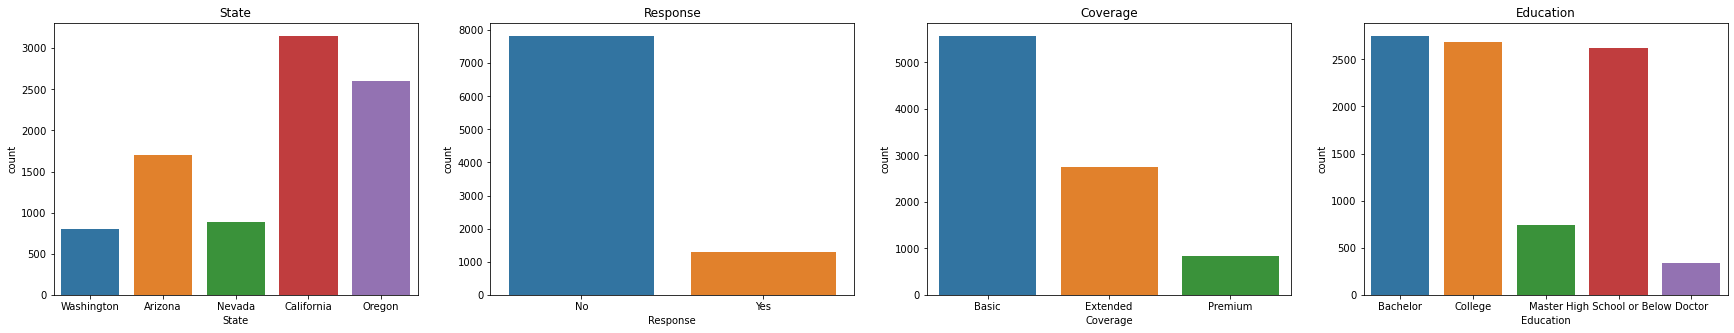

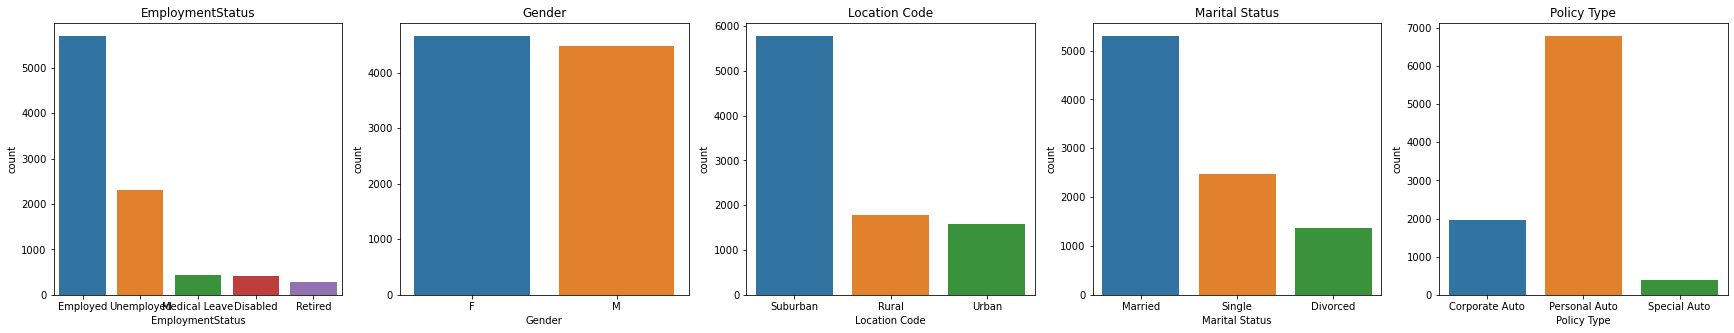

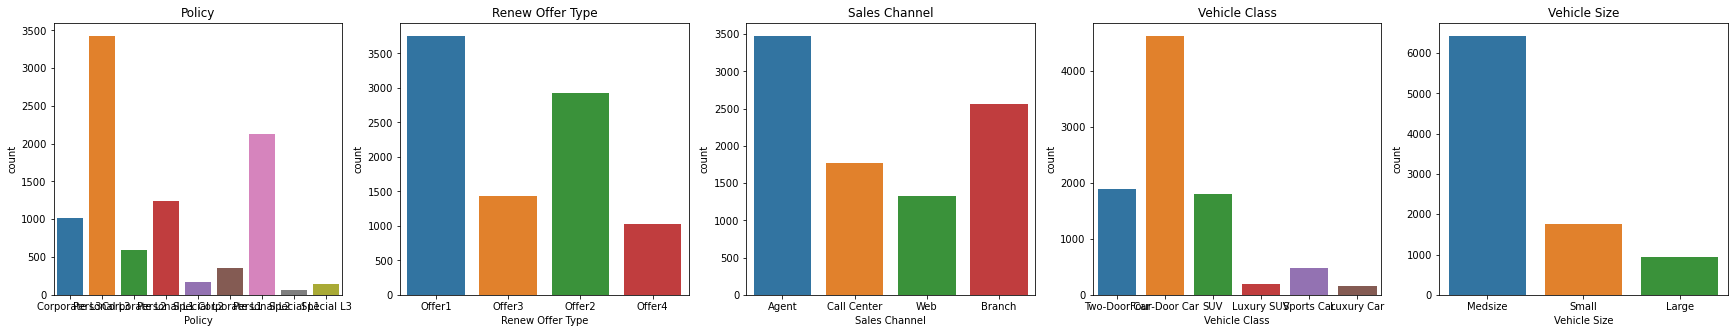

In [6]:
count_maker(customers_cat[['State', 'Response', 'Coverage', 'Education']], figsize_x = 30, figsize_y = 5)
count_maker(customers_cat[['EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type']], figsize_x = 30, figsize_y = 5)
count_maker(customers_cat[['Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']], figsize_x = 30, figsize_y = 5)

`Coverage`, `Location Code`, `Marital Status`, `Vehicle Size` and perhaps `Policy Type` look similar in distribution. And of course, `Policy Type` and `Policy` have redundant data.

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

This cleaning was already done in another lab, `Renew Offer Type` was cleaned and ordinaly encoded to become numerical, along with eliminating redundancy between `Policy Type` and `Policy`

The first having only `Corporate`, `Personal` and `Special` values, while the second retaining the `L1`, `L2` and `L3` values.

`Vehicle Class` has also redundancy in its values, was cleaned grouping the luxury and sport vehicles together. Something similar was done also with the `Education` and `Employment Status` tables, reducing labels.

### 4. Plot time variable. Can you extract something from it?

In [7]:
# Let's first make it datatime

customers_cat["Effective To Date"] = pd.to_datetime(customers_cat["Effective To Date"])

<AxesSubplot:xlabel='Effective To Date', ylabel='Density'>

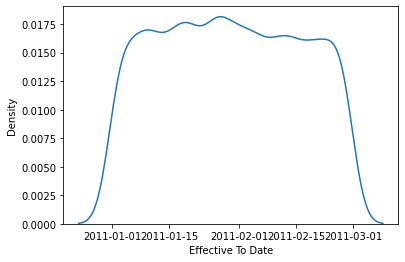

In [8]:
sns.kdeplot(data=customers_cat, x="Effective To Date")

We can see that the distribution is quite uniform, almost all values have a similar chance of happening. This means that the column won't be useful for predicting anything, as the values will be the same for all the dataset.